In [90]:
#Boilerplate Library Imports
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
from nltk.collocations import *

In [3]:
#Reading the Data file 
df=pd.read_csv('C://Sem1/Python/drugsCom_raw/drugsComTrain_raw.tsv', sep='\t')

In [4]:
#observe for conditions that do not look like conditions , e.g : '2</span> users found this comment helpful.'

df.condition.unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

# Regular Expression and Identification of '2</span> users found this comment helpful.' kinds of expression and eliminating it as this does not add any value to the Condition Column

In [6]:
def filter_rows(name):
    if(type(re.search("users found this comment",str(name)))is not type(None)):
        return 1
    else:
        return 0

In [7]:
df['filter'] = df.condition.apply(lambda x:filter_rows(x))

In [10]:
df = df.loc[df['filter'] == 0,]   

In [11]:
tokenized=df['review'].str.split()

# Preprocessing and Spliting the Line using the tokenized column

In [12]:
df['tokenized'] = tokenized

In [14]:
df['tokenized'][:10]

0    ["It, has, no, side, effect,, I, take, it, in,...
1    ["My, son, is, halfway, through, his, fourth, ...
2    ["I, used, to, take, another, oral, contracept...
3    ["This, is, my, first, time, using, any, form,...
4    ["Suboxone, has, completely, turned, my, life,...
5    ["2nd, day, on, 5mg, started, to, work, with, ...
6    ["He, pulled, out,, but, he, cummed, a, bit, i...
7    ["Abilify, changed, my, life., There, is, hope...
8    [", I, Ve, had, nothing, but, problems, with, ...
9    ["I, had, been, on, the, pill, for, many, year...
Name: tokenized, dtype: object

In [15]:
#Stop Words Removing from the file.

stop_words = set(stopwords.words('english'))
df['review_without_stopwords'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['review_without_stopwords']
tokenized=df['review_without_stopwords'].str.split()

In [17]:
vocab_filename = pd.read_csv('c://Sem1/Python/drugsCom_raw/Pool_Data.csv')
vocab_filename[:10]

def polarity(df):
    if df.Polarity =='negative' and df.Type =='weaksubj':
        return -0.5
    elif df.Polarity =='negative' and df.Type =='strongsubj':
        return -1.0
    elif df.Polarity =='positive' and df.Type =='strongsubj':
        return 1
    elif df.Polarity =='positive' and df.Type =='weaksubj':
        return 0.5
    else:
        return 0

In [18]:
vocab_filename.columns

Index(['Word', 'Polarity', 'Type'], dtype='object')

In [19]:
vocab_filename['polarity_index'] = vocab_filename.apply(polarity,axis=1) #Initializing Polarity Index and Appending to Vocab File

In [20]:
#Using a Dictionary to Zip Words and Polarity Index together

d = dict()
for a,b in zip(list(vocab_filename.Word),list(vocab_filename.polarity_index)):
    d[a] = b

In [89]:
d['abate']

-0.5

# Model Building Using Custom Function

In [24]:
#SENTIMENT ANALYSIS USING Basic Functionality (This fuction reads from the Dictionary and assigns the score to the keys 
# which is the words in the tokenized Review Column)
def sentiment(series):
    score = 0
    for i in series:
        if i in d.keys():
            score = score + d[i]
    if score>0:
        return 1
    elif score<0:
        return -1        
    else:
        return 0

In [25]:
#Predicting Sentiment for the Data Frame df by applying the sentiment Function Declared above on each and every word 
# encountered and then summing up the Sentiments 
df['tokenized_score'] = df.tokenized.apply(lambda x : sentiment(x)) 

In [26]:
#Scoring tokenized column
df[['review','tokenized_score']][:10]

,review,tokenized_score
0,"""It has no side effect, I take it in combinati...",0
1,"""My son is halfway through his fourth week of ...",-1
2,"""I used to take another oral contraceptive, wh...",1
3,"""This is my first time using any form of birth...",1
4,"""Suboxone has completely turned my life around...",1
5,"""2nd day on 5mg started to work with rock hard...",1
6,"""He pulled out, but he cummed a bit in me. I t...",0
7,"""Abilify changed my life. There is hope. I was...",-1
8,""" I Ve had nothing but problems with the Kepp...",-1
9,"""I had been on the pill for many years. When m...",1


In [72]:
#Declaring New DataFame for Grouping and Descriptive Analysis

new = df[['drugName', 'condition', 'usefulCount','rating','review','tokenized_score']].copy()

In [73]:
new[:10]

,drugName,condition,usefulCount,rating,review,tokenized_score
0,Valsartan,Left Ventricular Dysfunction,27,9,"""It has no side effect, I take it in combinati...",0
1,Guanfacine,ADHD,192,8,"""My son is halfway through his fourth week of ...",-1
2,Lybrel,Birth Control,17,5,"""I used to take another oral contraceptive, wh...",1
3,Ortho Evra,Birth Control,10,8,"""This is my first time using any form of birth...",1
4,Buprenorphine / naloxone,Opiate Dependence,37,9,"""Suboxone has completely turned my life around...",1
5,Cialis,Benign Prostatic Hyperplasia,43,2,"""2nd day on 5mg started to work with rock hard...",1
6,Levonorgestrel,Emergency Contraception,5,1,"""He pulled out, but he cummed a bit in me. I t...",0
7,Aripiprazole,Bipolar Disorde,32,10,"""Abilify changed my life. There is hope. I was...",-1
8,Keppra,Epilepsy,11,1,""" I Ve had nothing but problems with the Kepp...",-1
9,Ethinyl estradiol / levonorgestrel,Birth Control,1,8,"""I had been on the pill for many years. When m...",1


In [74]:
a = new.groupby(['drugName', 'condition'],as_index=False).agg({'tokenized_score' : 'sum'})
a[:5]

,drugName,condition,tokenized_score
0,A + D Cracked Skin Relief,Bacterial Skin Infection,-1
1,A / B Otic,Otitis Media,-1
2,Abacavir / dolutegravir / lamivudine,HIV Infection,6
3,Abacavir / lamivudine / zidovudine,HIV Infection,1
4,Abatacept,Juvenile Idiopathic Arthritis,-1


# MATPLOT LIB and Visualizations

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
set_d = [x,y,z,w]

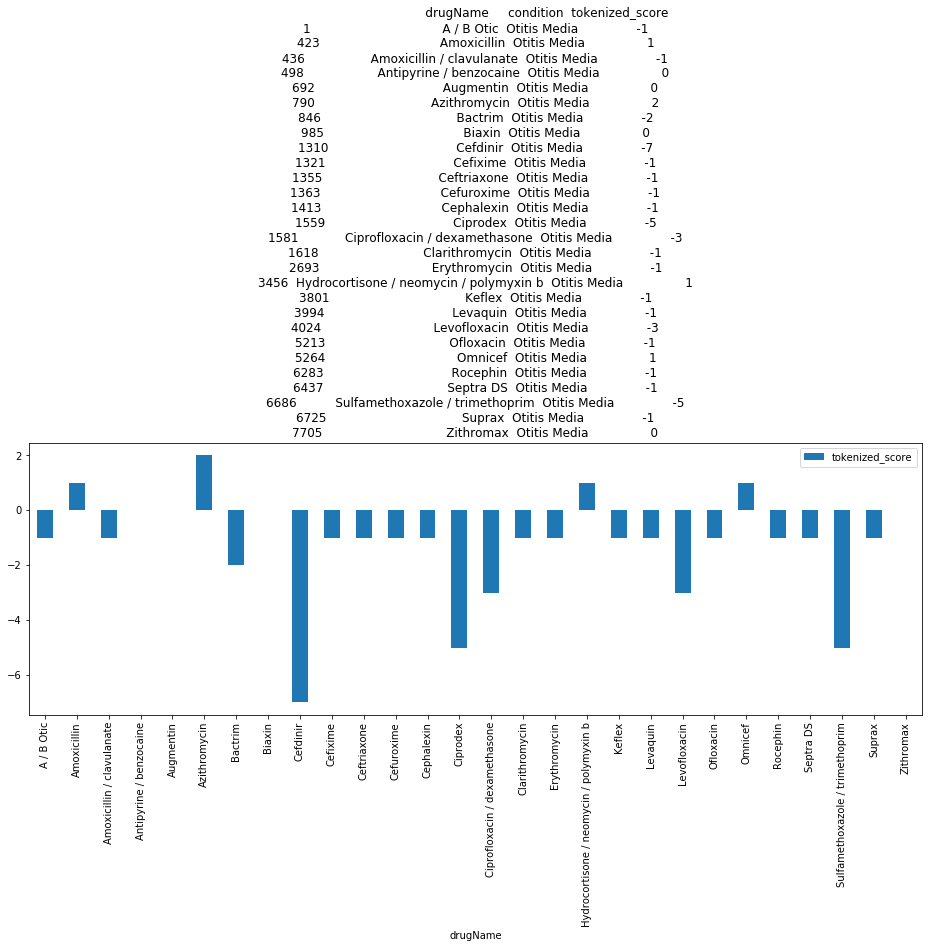

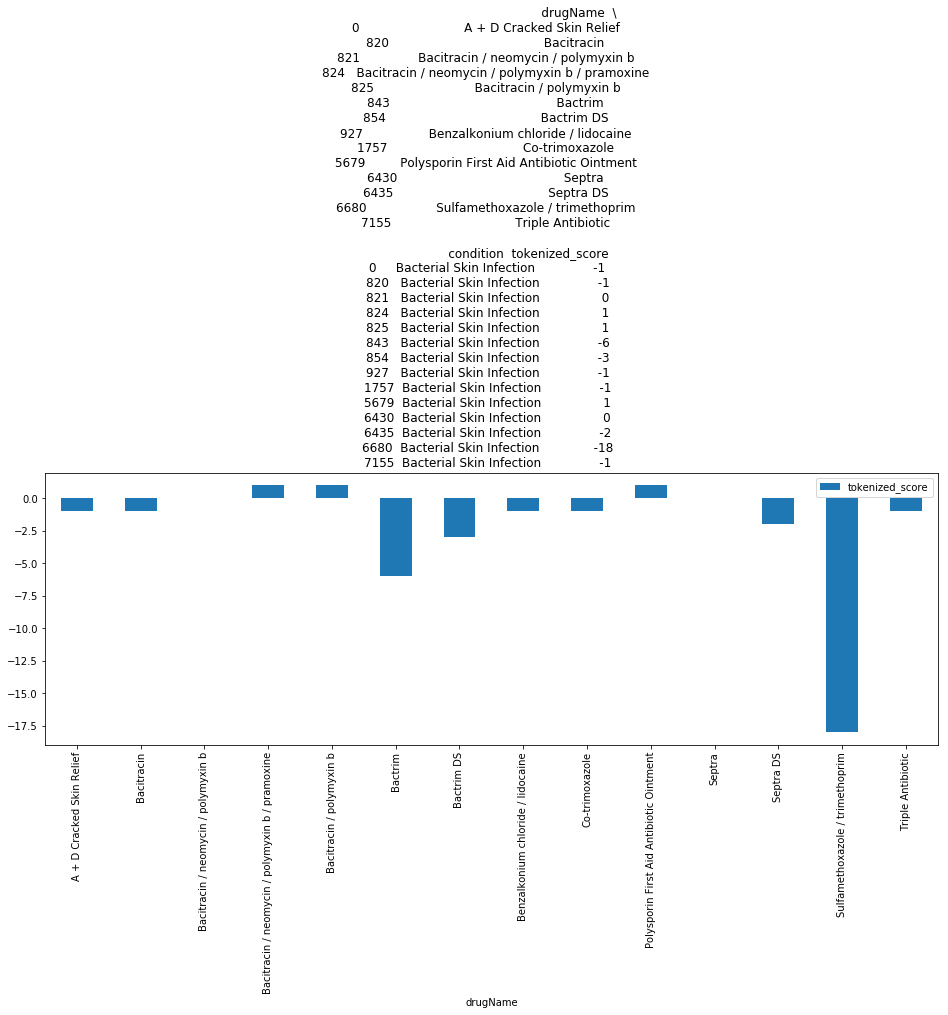

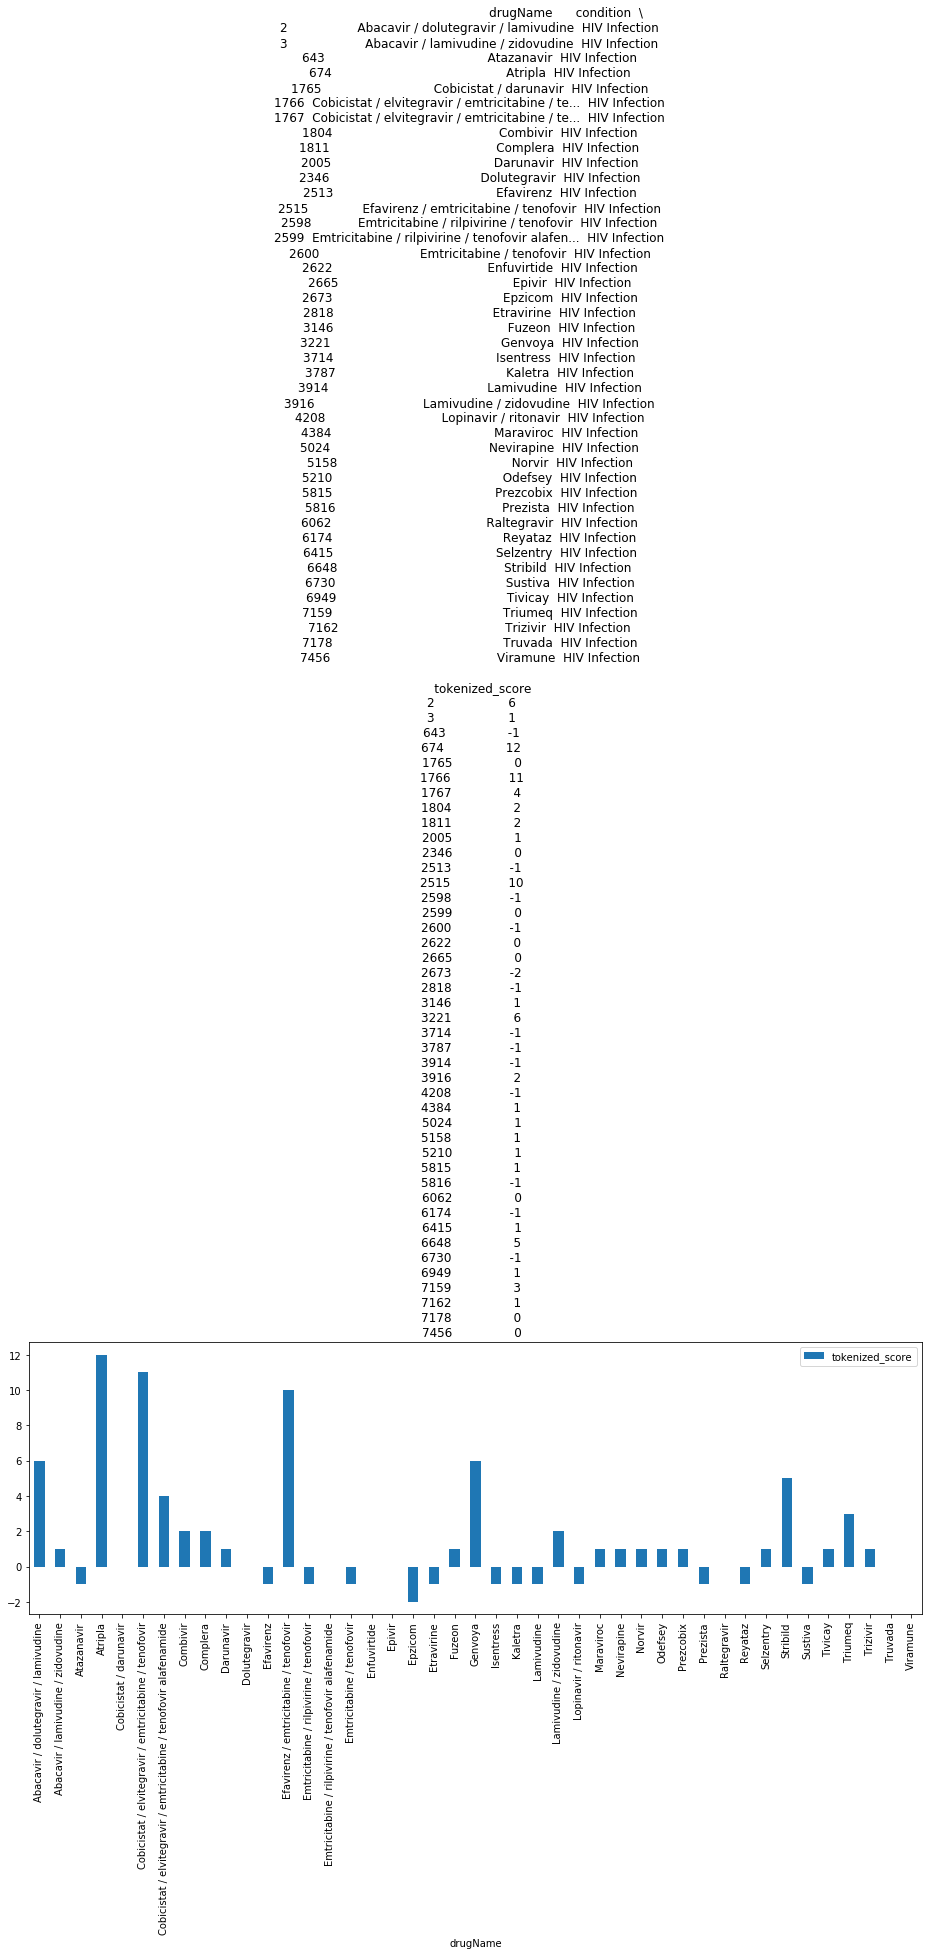

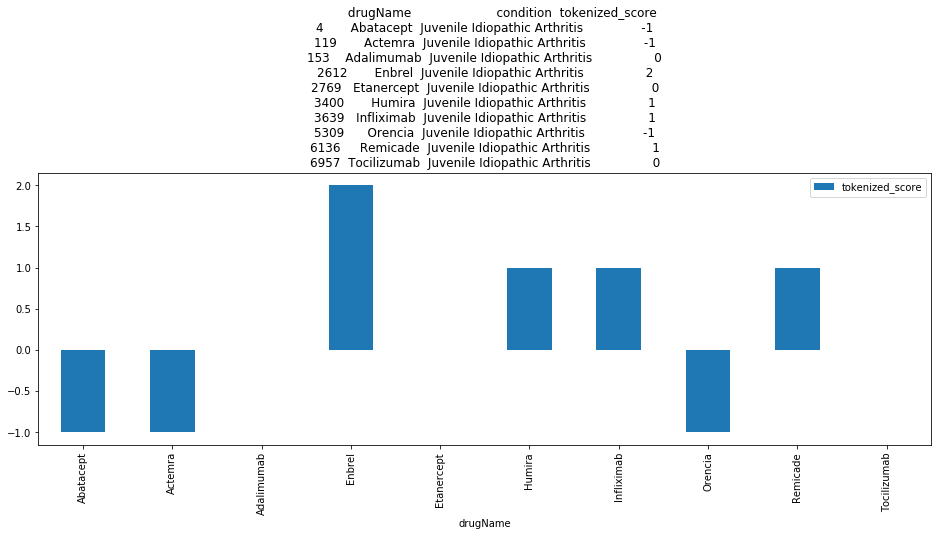

In [85]:
#Plotting Visualizations for 4 Drugs
x = a.loc[a['condition']=='Otitis Media']
y = a.loc[a['condition']=='Bacterial Skin Infection']
z = a.loc[a['condition']=='HIV Infection']
w = a.loc[a['condition']=='Juvenile Idiopathic Arthritis']
plt.rcParams['figure.figsize'] = (16,5)

for i in set_d:
    Plot = i.set_index('drugName')
    Plot[['tokenized_score']].plot.bar()
    plt.title(i)

In [77]:
conditions = a.condition.unique()

In [86]:
#Getting Best Drug For all the different Conditions Listed in the data set. Note , here that there may be more than one 
#drug as the best one as the tokenized score may be the same. 
final = pd.DataFrame()
for cond in conditions:
    maxi = a.loc[a['condition']==cond,'tokenized_score'].max()
    temp = a.loc[(a['condition']==cond)&(a['tokenized_score']== maxi),]
    final = pd.concat([final,temp])  

In [87]:
final.reset_index(drop=True,inplace=True)

In [88]:
final

,drugName,condition,tokenized_score
0,Bacitracin / neomycin / polymyxin b / pramoxine,Bacterial Skin Infection,1
1,Bacitracin / polymyxin b,Bacterial Skin Infection,1
2,Polysporin First Aid Antibiotic Ointment,Bacterial Skin Infection,1
3,Azithromycin,Otitis Media,2
4,Atripla,HIV Infection,12
5,Enbrel,Juvenile Idiopathic Arthritis,2
6,Etanercept,Rheumatoid Arthritis,25
7,Aripiprazole,Agitated State,-4
8,Risperdal,Autism,3
9,Venlafaxine,Autism,3
